In [2]:
from datetime import datetime
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import GridSearchCV


In [3]:
# Load dataset from csv file
dataset = pd.read_csv('../HOG_nhom_02/HOG_nhom_02.csv')

# Hiển thị số mẫu dữ liệu tương ứng với từng nhãn
print(dataset.groupby('label').size())

label
4    72
5    73
6    56
dtype: int64


KneighborsClassifier...
Results for fold 1:
              precision    recall  f1-score   support

           4       0.93      1.00      0.97        14
           5       0.89      1.00      0.94        16
           6       1.00      0.73      0.84        11

    accuracy                           0.93        41
   macro avg       0.94      0.91      0.92        41
weighted avg       0.93      0.93      0.92        41

Accuracy for fold 1: 0.926829268292683
Precision for fold 1: [0.93333333 0.88888889 1.        ]
Recall for fold 1: [1.         1.         0.72727273]
F1 score for fold 1: [0.96551724 0.94117647 0.84210526]
--------------------------------------------------
Results for fold 2:
              precision    recall  f1-score   support

           4       1.00      1.00      1.00        13
           5       0.91      1.00      0.95        20
           6       1.00      0.71      0.83         7

    accuracy                           0.95        40
   macro avg       0.97   

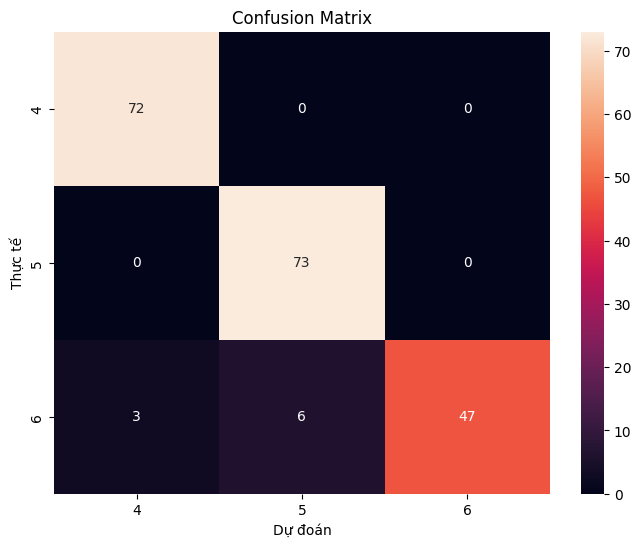

Accuracy average: 0.9553658536585365 0.9553658536585365
Precision average: [0.96280702 0.93197691 1.        ] 0.964927976506924
Recall average: [1.         1.         0.82549118] 0.9418303918303917
F1 score average: [0.98080149 0.96440753 0.9017254 ] 0.9489781390220924
Duration: 0:00:00.293005


In [9]:
print("KneighborsClassifier...")
# Chia dữ liệu dùng phương pháp cross-validation
X = dataset.drop('label', axis=1)
y = dataset['label']

'''
    train_test_split: chia dữ liệu thành 2 phần train và test
    X: dữ liệu cần chia
    y: nhãn tương ứng với dữ liệu
    test_size: tỉ lệ dữ liệu test, 0.2 nghĩa tyỉ lệ 20% dữ liệu test, 80% dữ liệu train
    random_state: seed giúp tái tạo kết quả, 42 là giá trị ngẫu nhiên
    return:
        X_train: dữ liệu train
        X_test: dữ liệu test
        y_train: nhãn tương ứng với dữ liệu train
        y_test: nhãn tương ứng với dữ liệu test
'''
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

'''
    KNeighborsClassifier: dùng mô hình KNN để phân loại
    n_neighbors: số lượng điểm hàng xóm cần xem xét
    metric: độ đo khoảng cách giữa các điểm
    p: tham số cho metric
        p = 1: khoảng cách Manhattan
        p = 2: khoảng cách Euclidean
'''
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)

kf = KFold(n_splits=5, random_state=42, shuffle=True)

fold = 0
cm =0
accuracy_tb = 0
precision_tb = 0
recall_tb = 0
f1_tb = 0
for train_index, test_index in kf.split(X):
    fold += 1
    # Chia tập dữ liệu theo chỉ số được tạo bởi KFold
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Huấn luyện mô hình trên tập huấn luyện
    classifier.fit(X_train, y_train)

    # Dự đoán trên tập kiểm thử
    y_pred = classifier.predict(X_test)

    # Hiển thị báo cáo phân loại cho từng fold
    print(f"Results for fold {fold}:")
    print(classification_report(y_test, y_pred))
    # Hiển thị ma trận nhầm lẫn cho từng fold
    cm_fold = confusion_matrix(y_test, y_pred)
    cm += cm_fold

    # tính tổng accracy, precision, recall, f1_score cho từng fold
    accuracy = accuracy_score(y_test, y_pred, normalize=True)
    precision = precision_score(y_test, y_pred, average=None)
    recall = recall_score(y_test, y_pred, average=None)
    f1 = f1_score(y_test, y_pred, average=None)
    print(f"Accuracy for fold {fold}: {accuracy}")
    print(f"Precision for fold {fold}: {precision}")
    print(f"Recall for fold {fold}: {recall}")
    print(f"F1 score for fold {fold}: {f1}")
    print("--------------------------------------------------")
    # Tính accuracy, precision, recall, f1_score trung bình 
    accuracy_tb += accuracy
    precision_tb += precision
    recall_tb += recall
    f1_tb += f1

    


# Hiển thị ma trận nhầm lẫn cho toàn bộ dữ liệu
print("Confusion matrix for all data:")
print(cm)
class_labels = ['4', '5', '6']
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Dự đoán')
plt.ylabel('Thực tế')
plt.title('Confusion Matrix')
plt.show()

# Tính accuracy, precision, recall, f1_score trung bình
accuracy_tb /= fold
precision_tb /= fold
recall_tb /= fold
f1_tb /= fold
print(f"Accuracy average: {accuracy_tb}", np.mean(accuracy_tb))
print(f"Precision average: {precision_tb}", np.mean(precision_tb))
print(f"Recall average: {recall_tb}", np.mean(recall_tb))
print(f"F1 score average: {f1_tb}", np.mean(f1_tb))


# Hiển thị thời gian xử lý 1 mẫu với đơn vị milisecond
start_time = datetime.now()
classifier.predict(X_test.iloc[0:1])
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

